## **Twitter Watch**

Have you ever wished you could have a summary of particular accounts without reading all of their tweets? Were you ever curious who are the top fans of those accounts?
Or simpler, did you ever wish you could search through an account's tweets in a csv file rather than twitter? Here, we can do all of these tasks using several lines of coding.  

We first want to extract tweets from various accounts, then categorize them using sentiment analysis to positive, neutral, or negative. We then will get the latest 5000 replies and do a sentiment analysis on those too. Next, we identify the top 5 active followers of these accounts. And finally, we summarize the accounts in 1 and 2 paragraphs. This way, you will know what each accout has been mainly focused on in a particular period of time. 

Ok, let's get started.

Here are the accounts for which we are scrapping the tweets since Feb 1st:

1. Elon Musk (@elonmusk)
2. Barack Obama (@BarackObama)
3. Cathie Wood (@cathiedwood)

We will do all the steps separately for each one of these accounts.

## 1. Elon Musk

### 1.1. Scraping tweets


In [ ]:
from TwitterWatch import TwitterWatch
from datetime import date, timedelta

In [ ]:
elon_tw = TwitterWatch("elonmusk")
elon_tweets = elon_tw.scrape(
    flow = "from",
    until = date.today(),
    since = date.today() - timedelta(days=10),
    limit = 10
)

### 1.2. Sentiment Analysis

Alright, we got the tweets. Now, lets do sentiment analysis using zero-shot classification in three categories: 

1. Positive
2. Neutral
3. Negative

We first look at Elon's tweets and then the replies. 
Note: speciall thanks to the sweet Hugging Face APIs!
#### 1.2.1. Elon's Tweets

In [ ]:
elon_sentiments = elon_tw.sentiment(tweets=elon_tweets, labels=["positive", "neutral", "negative"])

Perfect! Now we have scores of each category for each tweet. If we average these scores per categiry across tweets, we have gained a measure to analyze the account itself within that period. Let's see: 

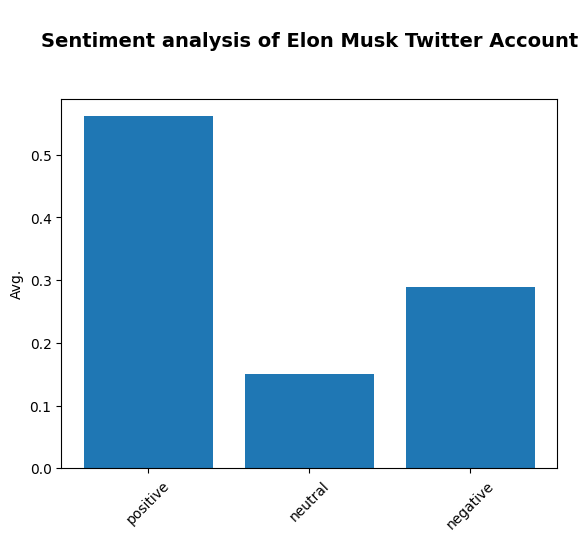

In [4]:
import matplotlib.pyplot as plt
from collections import defaultdict

plt.bar(*zip(*elon_sentiments.items()))
plt.xticks(rotation = 45)
plt.title("\nSentiment analysis of Elon Musk Twitter Account\n\n", fontsize = 14, fontweight = 'bold')
plt.ylabel("Avg.")
plt.show()

Quite positive! Let's now look at the replies. I limited them to 10 tweets due to computational load but we can simply remove the limitation.

#### 1.2.2. Tweet Replies

In [ ]:
elon_retweets = elon_tw.scrape(
    flow = "to",
    until = date.today(),
    since = date.today() - timedelta(days=10),
    limit = 10
)

elon_sentiments = elon_tw.sentiment(tweets=elon_retweets, labels=["positive", "neutral", "negative"])

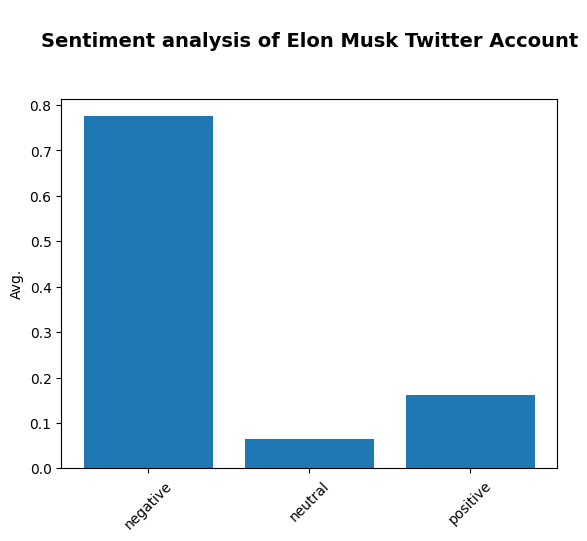

In [6]:
plt.bar(*zip(*elon_sentiments.items()))
plt.xticks(rotation = 45)
plt.title("\nSentiment analysis of Elon Musk Twitter Account\n\n", fontsize = 14, fontweight = 'bold')
plt.ylabel("Avg.")
plt.show()

Here, we can we how positive or negative the tweet replies are: 

Now, lets have a look at the sentiment analysis of the overal audience. Do we expect Elon's audience to be positive, neutral or negative?

Done!
Honestly, more positive than I thought!

Ok, now, lets find out the most active followers from the replies. 

---



In [7]:
elon_tw.fans(elon_retweets)[:5]

['silelf',
 'justdan_again',
 'earthcityblues',
 'drdolittle2023',
 'bennyblanco8888']

Pretty cool!
Now, lets summarize Elon's Tweets:

### 1.3. Account Summarization

For summarization,  we use a large language model (t5-large) using the sweet Huggingface API.


The model is designed for an input of 512 and due to a very large input size, it crashes if all tweets are used as input. Therefore, I am breaking it to a number of chunks with a length of 1024. The result would be a number of summaries, one for each chunk.
Then I again apply the summarization to the resulting contactenated text to get the final summary.  

Now, we have the summary of all 

In [ ]:
elon_tw.summarize(elon_tweets)

Interesting!

Now, let's have a look at our second Twitter Account.
## 2. Barack Obama
### 2.1. Scraping Tweets

In [ ]:
barack_tw = TwitterWatch("barackobama")
barack_tweets = barack_tw.scrape(
    flow = "from",
    until = date.today(),
    since = date.today() - timedelta(days=10),
    limit = 10
)

### 2.2. Sentiment Analysis
#### 2.2.1. Barack's Tweets

In [ ]:
barack_sentiments = barack_tw.sentiment(tweets=barack_tweets, labels=["positive", "neutral", "negative"])

In [ ]:
plt.bar(*zip(*barack_sentiments.items()))
plt.xticks(rotation = 45)
plt.title("\nSentiment analysis of Barack Obama's Twitter Account\n\n", fontsize = 14, fontweight = 'bold')
plt.ylabel("Avg.")
plt.show()

Well, not surprising!

#### 2.2.2. Tweet Replies

In [ ]:
barack_retweets = barack_tw.scrape(
    flow = "to",
    until = date.today(),
    since = date.today() - timedelta(days=10),
    limit = 10
)

Here, we can we how positive or negative the tweet replies are: 

In [ ]:
barack_sentiments = barack_tw.sentiment(tweets=barack_retweets, labels=["positive", "neutral", "negative"])

Now, lets have a look at the sentiment analysis of the overal audience.

In [ ]:
plt.bar(*zip(*barack_sentiments.items()))
plt.xticks(rotation = 45)
plt.title("\nSentiment analysis of Barack Obama's Twitter Account\n\n", fontsize = 14, fontweight = 'bold')
plt.ylabel("Avg.")
plt.show()

Done!

Ok, now, lets find out the most active followers from the replies. 

In [ ]:
barack_tw.fans(barack_retweets)[:5]

And now, it's time for summarization:

### 2.3. Account Summarization

No wonder the average content was close to 90% positive!

Now, let's summarize in two paragraphs:

In [ ]:
barack_tw.summarize(barack_tweets)

## 3. **Cathie Wood**

Side note: she is founder, CEO and CIO of ARKinvest. 

### 3.1. Scraping Tweets




In [ ]:
cathie_tw = TwitterWatch("cathiedwood")
cathie_tweets = cathie_tw.scrape(
    flow = "from",
    until = date.today(),
    since = date.today() - timedelta(days=10),
    limit = 10
)

### 3.2. Sentiment Analysis
#### 3.2.1. Cathie's Tweets

In [ ]:
cathie_sentiments = cathie_tw.sentiment(tweets=cathie_tweets, labels=["positive", "neutral", "negative"])

In [ ]:
plt.bar(*zip(*cathie_sentiments.items()))
plt.xticks(rotation = 45)
plt.title("\nSentiment analysis of Cathie Wood's Twitter Account\n\n", fontsize = 14, fontweight = 'bold')
plt.ylabel("Avg.")
plt.show()

Close to Elon.

#### 3.2.2. Tweet Replies

In [ ]:
cathie_tw = TwitterWatch("cathiedwood")
cathie_retweets = cathie_tw.scrape(
    flow = "to",
    until = date.today(),
    since = date.today() - timedelta(days=10),
    limit = 10
)

In [ ]:
cathie_sentiments = cathie_tw.sentiment(tweets=cathie_retweets, labels=["positive", "neutral", "negative"])

In [ ]:
plt.bar(*zip(*cathie_sentiments.items()))
plt.xticks(rotation = 45)
plt.title("\nSentiment analysis of Cathie Wood's Twitter Account\n\n", fontsize = 14, fontweight = 'bold')
plt.ylabel("Avg.")
plt.show()

Here, we can we how positive or negative the tweet replies are: 

Now, lets have a look at the sentiment analysis of the overal audience.

Done!

Ok, now, lets find out the most active followers from the replies. 

In [ ]:
cathie_tw.fans(cathie_retweets)

And lastly, account summarization!

### 3.3. Account Summarization

Now, let's summarize in two paragraphs:

In [ ]:
cathie_tw.summarize(cathie_tweets)

All done! There is of course room for improvement, especially in summarization when it comes to more than one paragraph.

As a next step, we can also try streaming the results using a REST API.
There are also lots of other analysis we can do applying these methods. For instance, if we define the categories as Elon's companies and investigate the amount of tweets about them using sentiment analysis, there might (or might not) be a correlation between this pattern and the company's stocks.
And lots of other fun things to try!

If you have any qestions or wanted to discuss further, please contact me via: nheydari@uwaterloo.ca